## Clasificación con fuzzy c-means

Dada la naturaleza de los datos podrían existir datos que pertenzcan a una o dos clases con un grado de probabilidad, reutilizando la preparación de datos de los notebooks anteriores 

In [1]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

### Preparación de datos

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./out_dataset_1.csv', delimiter=';')

In [3]:
df.drop_duplicates(subset=['filename']).groupby(by='grupo', as_index=False).count().loc[:, ['grupo', 'filename']]

,grupo,filename
0,1,15
1,2,17
2,3,10
3,4,11


In [4]:
df['grupo'] = df['grupo'] - 1

In [5]:
df_clas = df.iloc[:, 2:-6]
columns = ['filename', 'grupo', 'amplitude_envelope', 'rmse', 'zero_crossing_rate', 'spectral_centroid'] # se agrega una columna
                                                                                             # que sirve de etiqueta
                                                                                             # que es grupo
mfcc_cols = [f'mfcc{x+1}' for x in range(13)]
columns = columns + mfcc_cols

In [6]:
df_clas = df_clas.loc[:, columns]
df_clas.drop_duplicates(subset=[x for x in columns if x !='filename'], inplace=True)
df_clas.shape

(824, 19)

In [7]:
df_clas_ = df_clas.set_index([pd.Series(range(0,824)),'filename' , 'grupo'])
df_clas_.index.names = ['id', 'f', 'grupo']

x = df_clas_.to_numpy()
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


## Modelado

In [8]:
fcm = FCM(n_clusters=4)
fcm.fit(x_scaled)

In [9]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(x_scaled)

In [10]:
fcm_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [12]:
reduced_data = pca.fit_transform(x_scaled)
reduced_centers = pca.fit_transform(fcm_centers)

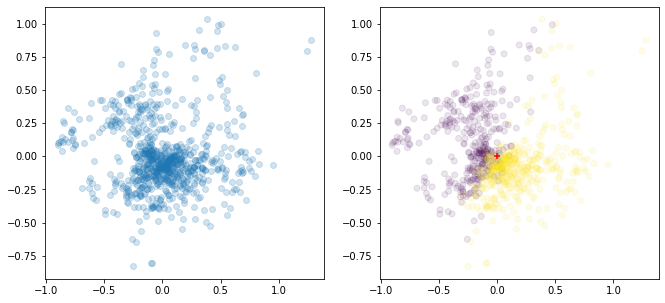

In [15]:
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(reduced_data[:,0], reduced_data[:,1], alpha=.2)
axes[1].scatter(reduced_data[:,0], reduced_data[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(reduced_centers[1,0], reduced_centers[1,1], marker="+", s=30, c='r')
plt.show()

## Conclusión

Los centros del algoritmo están superpuestos pero se generan 4 centros pero estos están superpuestos porque los datos son muy juntos no hya grupos claros definidos.